In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '../data/popular_perfumes.csv'
df = pd.read_csv(data_path)

# Drop the 'Main Accords' column
df = df.drop('Main Accords', axis=1)

# Remove rows where 'Brand' is NaN
df = df.dropna(subset=['Brand'])

# Replace non-4-digit 'Release Year' values with NaN
df['Release Year'] = df['Release Year'].apply(lambda x: np.nan if pd.isnull(x) or len(str(x)) != 4 else x)

# Display the first few rows
df.head()

,Perfume Name,Brand,Release Year,Fragrance Notes,Rating,Image Path
0,Anubis (V.2) Aaron Terence Hughes 2020,Aaron Terence Hughes,2020,"Apple, Mandarin orange, Orange, Fruits, Ambrox...",7.4,../images_v2/Anubis_(V.2)_Aaron_Terence_Hughes...
1,Athena Aaron Terence Hughes 2023,Aaron Terence Hughes,2023,"Bergamot, Rose, Amber, Lily, Peony, Raspberry,...",8.2,../images_v2/Athena_Aaron_Terence_Hughes_2023.jpg
2,Adonis Aaron Terence Hughes 2021,Aaron Terence Hughes,2021,"Peppermint, Bergamot, Tonka bean, Vanilla, Amb...",8.3,../images_v2/Adonis_Aaron_Terence_Hughes_2021.jpg
3,ATH x FM - Smoulder Aaron Terence Hughes 2021,Aaron Terence Hughes,2021,"Neroli, Lemon, Tobacco, Frankincense, Sandalwo...",8.1,../images_v2/ATH_x_FM_-_Smoulder_Aaron_Terence...
4,Aura Aaron Terence Hughes 2023,Aaron Terence Hughes,2023,"Bergamot, Lily of the valley, Amber, Ambergris...",7.6,../images_v2/Aura_Aaron_Terence_Hughes_2023.jpg


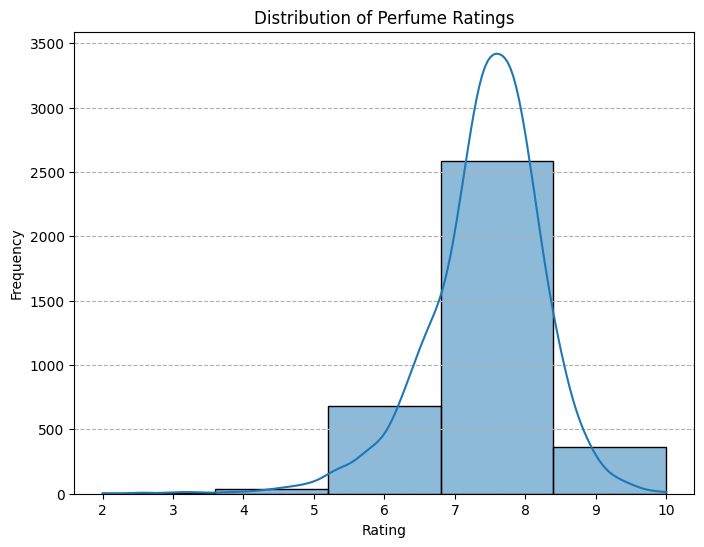

In [2]:
# Visualizing the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Perfume Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

/var/folders/s0/677hcg4s6qq1dq9p33lz22100000gn/T/ipykernel_10934/2601799282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Release Year', data=df, palette="coolwarm")


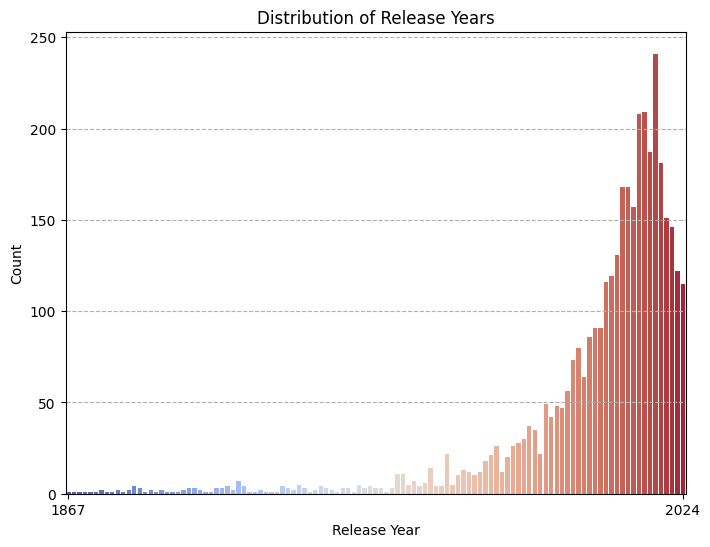

/var/folders/s0/677hcg4s6qq1dq9p33lz22100000gn/T/ipykernel_10934/2601799282.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Brand', data=df, palette="Set2")
/Users/hordiienkoalina/dev/fragrance-model/test-venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hordiienkoalina/dev/fragrance-model/test-venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12490 (\N{KATAKANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hordiienkoalina/dev/fragrance-model/test-venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12516 (\N{KATAKANA LETTER YA}) missing from current font.
  fig.canvas.print_figure(byt

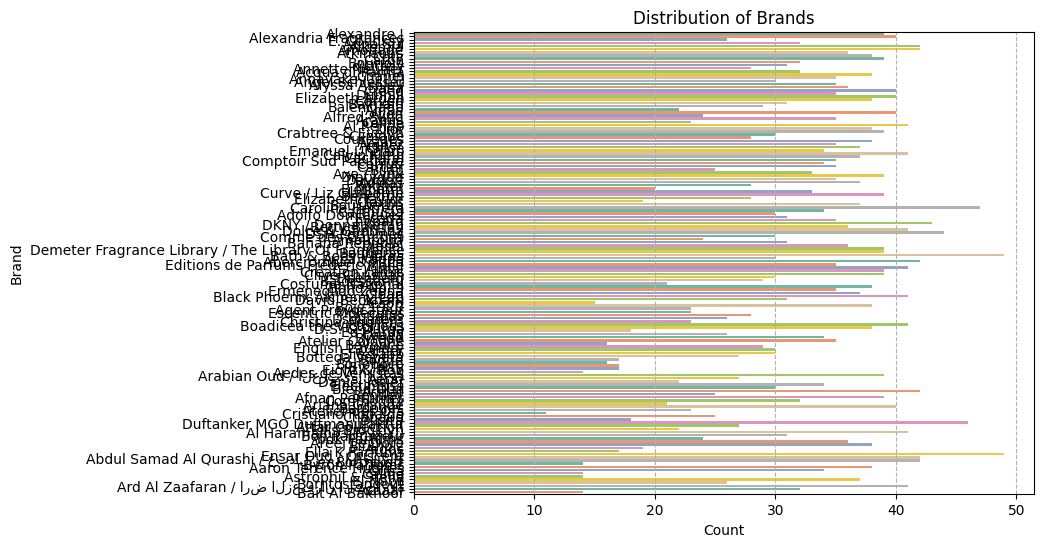

In [25]:
# Sort the DataFrame by 'Release Year'
df = df.sort_values('Release Year')

# Now plot the distribution of release years
plt.figure(figsize=(8, 6))
sns.countplot(x='Release Year', data=df, palette="coolwarm")
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')

# Get the current x-ticks and labels
locs, labels = plt.xticks()

# Set the x-ticks to only the first and last year
plt.xticks([locs[0], locs[-1]], [labels[0].get_text(), labels[-1].get_text()])

plt.show()

# Plotting the distribution of brands
plt.figure(figsize=(8, 6))
sns.countplot(y='Brand', data=df, palette="Set2")
plt.title('Distribution of Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.grid(axis='x', linestyle='--')
plt.show()

In [4]:
import pandas as pd
import shutil
import os
from sklearn.model_selection import train_test_split

# Count the number of instances for each class
class_counts = df['Brand'].value_counts()

# Get a list of classes that have more than one instance
valid_classes = class_counts[class_counts > 10].index

# Filter the DataFrame to only include these classes
df = df[df['Brand'].isin(valid_classes)]

# Now you can perform the stratified split
df_train, df_test_validation = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Brand'])
df_test, df_validation = train_test_split(df_test_validation, test_size=0.5, random_state=42, stratify=df_test_validation['Brand'])

def create_and_copy_images(df, destination_folder):
    # Create the directory if it does not exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    
    # Initialize a counter for skipped files
    skipped_files = 0

    for index, row in df.iterrows():
        source_path = row['Image Path']
        brand = row['Brand']
        
        # Skip entries where the image path is not a string
        if not isinstance(source_path, str):
            print(f"Skipping due to invalid path (not a string): {source_path}")
            skipped_files += 1
            continue
        
        # Create a directory for the brand if it doesn't exist
        brand_dir = os.path.join(destination_folder, brand)
        if not os.path.exists(brand_dir):
            os.makedirs(brand_dir)
        
        destination_path = os.path.join(brand_dir, os.path.basename(source_path))
        
        # Skip the file if it does not exist and increment the counter
        if not os.path.exists(source_path):
            print(f"Skipping missing file: {source_path}")
            skipped_files += 1
            continue
        
        shutil.copy(source_path, destination_path)
    
    # Print the number of skipped files
    if skipped_files > 0:
        print(f"Total skipped files: {skipped_files}")

# Paths for the train, test, and validation directories
train_images_dir = 'train_images'
test_images_dir = 'test_images'
validation_images_dir = 'validation_images'

# Create and copy images for train, test, and validation datasets
create_and_copy_images(df_train, train_images_dir)
create_and_copy_images(df_test, test_images_dir)
create_and_copy_images(df_validation, validation_images_dir)

Skipping missing file: ../images_v2/Purely_Orient_-_Cashmere_Wood_Ajmal.jpg
Total skipped files: 1


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import shutil

num_classes = 148

train_dir = '../model/train_images'
validation_dir = '../model/validation_images'
test_dir = '../model/test_images'

# Get all unique classes across all sets
all_classes = set(os.listdir(train_dir) + os.listdir(validation_dir) + os.listdir(test_dir))

# For each class, check if it appears in all sets
for class_ in all_classes:
    if not all(class_ in os.listdir(dir_) for dir_ in [train_dir, validation_dir, test_dir]):
        # If a class does not appear in all sets, remove it from the sets it appears in
        for dir_ in [train_dir, validation_dir, test_dir]:
            class_dir = os.path.join(dir_, class_)
            if os.path.exists(class_dir):
                shutil.rmtree(class_dir)  # This will remove the directory and all its contents

IMG_SIZE = 160  # Resize target
BATCH_SIZE = 32  # Batch size for training

# Data augmentation for the training data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# No augmentation for validation and test data generators
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

/Users/hordiienkoalina/dev/fragrance-model/test-venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 4602 images belonging to 148 classes.
Found 1480 images belonging to 148 classes.
Found 1477 images belonging to 148 classes.


In [7]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [8]:
base_model.trainable = False

In [9]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

inputs = tf.keras.Input(shape=IMG_SHAPE)
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [10]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),  # Updated loss function
              metrics=['accuracy'])

In [13]:
initial_epochs = 25

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=initial_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE)

Epoch 1/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 27s 181ms/step - accuracy: 0.2631 - loss: 3.6202 - val_accuracy: 0.3431 - val_loss: 3.4841
Epoch 2/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.3125 - loss: 1.6218 - val_accuracy: 0.2500 - val_loss: 1.9021
Epoch 3/25


2024-03-24 16:50:26.534338: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:50:26.566549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 28s 189ms/step - accuracy: 0.2858 - loss: 3.4676 - val_accuracy: 0.3723 - val_loss: 3.3286
Epoch 4/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.4062 - loss: 1.5248 - val_accuracy: 0.5000 - val_loss: 1.6015
Epoch 5/25


2024-03-24 16:50:54.574665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:50:54.617113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 237ms/step - accuracy: 0.3367 - loss: 3.2662 - val_accuracy: 0.4124 - val_loss: 3.1935
Epoch 6/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.5000 - loss: 1.5559 - val_accuracy: 0.3750 - val_loss: 1.3139
Epoch 7/25


2024-03-24 16:51:29.577501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:51:29.627642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 206ms/step - accuracy: 0.3551 - loss: 3.1508 - val_accuracy: 0.4361 - val_loss: 3.0687
Epoch 8/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.3750 - loss: 1.4446 - val_accuracy: 0.3750 - val_loss: 1.6038
Epoch 9/25


2024-03-24 16:52:00.207673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:52:00.254651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 208ms/step - accuracy: 0.3618 - loss: 3.0918 - val_accuracy: 0.4579 - val_loss: 2.9665
Epoch 10/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.4062 - loss: 1.5385 - val_accuracy: 0.3750 - val_loss: 1.5990
Epoch 11/25


2024-03-24 16:52:31.149390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:52:31.208518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 213ms/step - accuracy: 0.3847 - loss: 2.9772 - val_accuracy: 0.4749 - val_loss: 2.8743
Epoch 12/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.5000 - loss: 1.1840 - val_accuracy: 0.3750 - val_loss: 1.5031
Epoch 13/25


2024-03-24 16:53:02.806782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:53:02.862127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 208ms/step - accuracy: 0.4266 - loss: 2.8258 - val_accuracy: 0.4939 - val_loss: 2.7765
Epoch 14/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.4615 - loss: 1.3744 - val_accuracy: 0.3750 - val_loss: 1.8924
Epoch 15/25


2024-03-24 16:53:33.677215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:53:33.731201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 209ms/step - accuracy: 0.4183 - loss: 2.7892 - val_accuracy: 0.4959 - val_loss: 2.7044
Epoch 16/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.4375 - loss: 1.3279 - val_accuracy: 0.5000 - val_loss: 1.5468
Epoch 17/25


2024-03-24 16:54:04.697691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:54:04.754705: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 213ms/step - accuracy: 0.4486 - loss: 2.6459 - val_accuracy: 0.5143 - val_loss: 2.6305
Epoch 18/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.4062 - loss: 1.4482 - val_accuracy: 0.7500 - val_loss: 1.0559
Epoch 19/25


2024-03-24 16:54:36.429431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:54:36.479147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 30s 203ms/step - accuracy: 0.4811 - loss: 2.5766 - val_accuracy: 0.5299 - val_loss: 2.5580
Epoch 20/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.3750 - loss: 1.5081 - val_accuracy: 0.2500 - val_loss: 1.6510
Epoch 21/25


2024-03-24 16:55:06.721912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:55:06.773615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 233ms/step - accuracy: 0.4639 - loss: 2.5392 - val_accuracy: 0.5374 - val_loss: 2.5067
Epoch 22/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.5625 - loss: 1.1941 - val_accuracy: 0.8750 - val_loss: 0.6949
Epoch 23/25


2024-03-24 16:55:41.102859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:55:41.161285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 231ms/step - accuracy: 0.4864 - loss: 2.4514 - val_accuracy: 0.5428 - val_loss: 2.4408
Epoch 24/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.4062 - loss: 1.2592 - val_accuracy: 0.6250 - val_loss: 1.0454
Epoch 25/25


2024-03-24 16:56:15.288743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-24 16:56:15.349388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 226ms/step - accuracy: 0.4959 - loss: 2.4211 - val_accuracy: 0.5577 - val_loss: 2.3854


In [14]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print('\nTest accuracy:', test_accuracy)

46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.5408 - loss: 2.4167

Test accuracy: 0.5400815010070801


### Fine-Tuning

In [15]:
# Unfreeze the Top Layers of the Model
# Make sure to recompile the model first if it was previously compiled.
base_model.trainable = True

# Define how many layers you want to freeze. In this case, we choose to fine-tune from layer 100 onwards.
fine_tune_at = 100

# Freeze all layers before `fine_tune_at`
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [16]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate / 10),
              metrics=['accuracy'])

In [17]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 25/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 35s 216ms/step - accuracy: 0.1618 - loss: 3.8987 - val_accuracy: 0.5448 - val_loss: 2.2520
Epoch 26/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 204ms/step - accuracy: 0.2920 - loss: 3.2498 - val_accuracy: 0.6250 - val_loss: 0.7644
Epoch 27/35


2024-03-24 17:03:47.324754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


144/144 ━━━━━━━━━━━━━━━━━━━━ 35s 236ms/step - accuracy: 0.3750 - loss: 2.8842 - val_accuracy: 0.5455 - val_loss: 2.1308
Epoch 28/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 32s 213ms/step - accuracy: 0.4284 - loss: 2.6813 - val_accuracy: 0.5000 - val_loss: 1.0898
Epoch 29/35


2024-03-24 17:04:54.063943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


144/144 ━━━━━━━━━━━━━━━━━━━━ 38s 258ms/step - accuracy: 0.4488 - loss: 2.5251 - val_accuracy: 0.5550 - val_loss: 2.0462
Epoch 30/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 33s 223ms/step - accuracy: 0.4809 - loss: 2.3811 - val_accuracy: 0.8750 - val_loss: 0.6492
Epoch 31/35


2024-03-24 17:06:05.187483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


144/144 ━━━━━━━━━━━━━━━━━━━━ 39s 267ms/step - accuracy: 0.5088 - loss: 2.2419 - val_accuracy: 0.5788 - val_loss: 1.9444
Epoch 32/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 35s 240ms/step - accuracy: 0.5198 - loss: 2.2180 - val_accuracy: 0.6250 - val_loss: 0.8527
Epoch 33/35


2024-03-24 17:07:20.160521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


144/144 ━━━━━━━━━━━━━━━━━━━━ 43s 289ms/step - accuracy: 0.5265 - loss: 2.1595 - val_accuracy: 0.5951 - val_loss: 1.8447
Epoch 34/35
144/144 ━━━━━━━━━━━━━━━━━━━━ 34s 233ms/step - accuracy: 0.5423 - loss: 2.0912 - val_accuracy: 0.5000 - val_loss: 1.1452
Epoch 35/35


2024-03-24 17:08:37.262341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


144/144 ━━━━━━━━━━━━━━━━━━━━ 40s 269ms/step - accuracy: 0.5498 - loss: 2.0270 - val_accuracy: 0.6230 - val_loss: 1.7610


In [18]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print('\nTest accuracy:', test_accuracy)

46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.6061 - loss: 1.8157

Test accuracy: 0.6100543737411499


In [19]:
# Assuming 'train_generator' is your training data generator
class_indices = train_generator.class_indices

# Sort the class indices by their numeric value to ensure correct order
class_names = sorted(class_indices, key=class_indices.get)

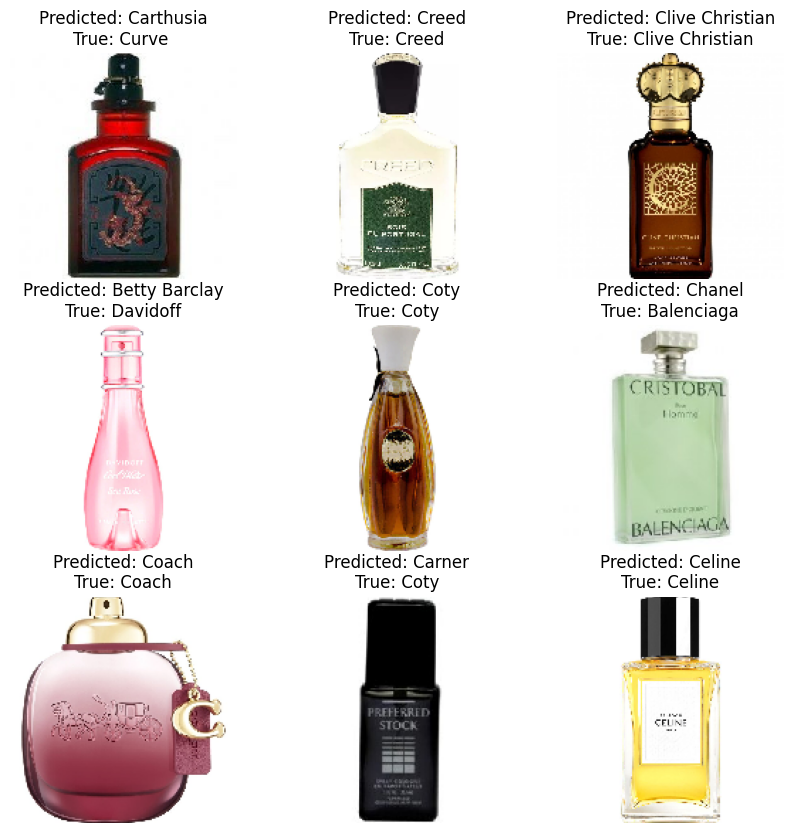

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve a batch of images from the test set
image_batch, label_batch = next(test_generator)

# Assuming your model's predictions
predictions = model.predict_on_batch(image_batch)

# Convert predictions and labels to class indices
predicted_class_indices = np.argmax(predictions, axis=-1)
true_class_indices = np.argmax(label_batch, axis=-1)

# Ensure the images are scaled correctly for display
image_batch_display = image_batch * 255.0
image_batch_display = image_batch_display.astype('uint8')  # Ensure correct data type for display

plt.figure(figsize=(10, 10))
for i in range(9):  # Display the first 9 images and predictions
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch_display[i])  # Use the adjusted image batch here
    predicted_label = class_names[predicted_class_indices[i]]
    true_label = class_names[true_class_indices[i]]
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')
plt.show()